In [1]:
import numpy as np
import pandas as pd
import scipy
from numpy import linalg
import cvxopt
from cvxopt import solvers, matrix
from scipy.spatial.distance import pdist, cdist, squareform

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


In [2]:
%%time
df_X_train = pd.read_csv('Xtr.csv', header=None, usecols=np.arange(3072))
df_X_test = pd.read_csv('Xte.csv', header=None, usecols=np.arange(3072))
df_y_train = pd.read_csv('Ytr.csv')


X_train = np.array(df_X_train, dtype=float)
X_test = np.array(df_X_test, dtype=float)
y_train = np.array(df_y_train['Prediction'], dtype=float)

CPU times: user 4.92 s, sys: 148 ms, total: 5.07 s
Wall time: 5.07 s


In [3]:
# Data Visualization : The Data set train is balance, OVA can be implemented
classes = np.unique(y_train)
for class_ in classes:
    print(class_, np.mean(class_ == y_train))

0.0 0.1
1.0 0.1
2.0 0.1
3.0 0.1
4.0 0.1
5.0 0.1
6.0 0.1
7.0 0.1
8.0 0.1
9.0 0.1


In [52]:
def rgb2gray(rgb, reshape = True):
    r = rgb[:1024].reshape(-1,1)
    g = rgb[1024:2048].reshape(-1,1)
    b = rgb[2048:].reshape(-1,1)
    colors = np.c_[r, g, b]
    gray = np.dot(colors, [0.299, 0.587, 0.114])
    # from matlab 0.2989 * R + 0.5870 * G + 0.1140 * B
    if reshape is True:
        gray = gray.reshape(32,32)
    return gray
    #return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [53]:
def plot(X, gray=True, lim=True):
    # lim : set a limit number not to crash
    n, p = X.shape
    for kk in range(n):
        if kk>12:
            break
        x = X[kk]
        im = rgb2gray(x)
        plt.imshow(im, cmap='gray')
        plt.show()

### Data augmentation

* We perform 4 rot90 and transpose every time so it will lead to 20K images

In [57]:
def transformations(X, y, gray=False):
    
    n, p = X.shape
    X_r = X[:,:1024]
    X_g = X[:,1024:2048]
    X_b = X[:,2048:]
    if gray is False:
        X_res = np.zeros((8*n,p))
        y_res = np.zeros(8*n)
    else:
        X_res = np.zeros((8*n,p/3))
        y_res = np.zeros(8*n)
        
    for kk in range(n):
        x_r = X_r[kk].reshape(32,32)
        x_g = X_b[kk].reshape(32,32)
        x_b = X_g[kk].reshape(32,32)
        for rot in range(4):
            x_rrot = np.rot90(x_r)
            x_grot = np.rot90(x_g)
            x_brot = np.rot90(x_b)
            
            if gray is False:
                X_res[8*kk + 2*rot+1] = np.r_[x_rrot.ravel(), x_grot.ravel(), x_brot.ravel()]
                y_res[8*kk + 2*rot+1] = y[kk]
                # transpose
                X_res[2*rot+8*kk] = np.r_[np.transpose(x_rrot).ravel(), np.transpose(x_grot).ravel(), np.transpose(x_brot).ravel()]
                y_res[8*kk + 2*rot] = y[kk]
            else:
                X_res[8*kk + 2*rot+1] = rgb2gray(np.r_[x_rrot.ravel(), x_grot.ravel(), x_brot.ravel()], reshape=False)
                y_res[8*kk + 2*rot+1] = y[kk]
                # transpose
                X_res[2*rot+8*kk] = rgb2gray(np.r_[np.transpose(x_rrot).ravel(),
                                                   np.transpose(x_grot).ravel(),
                                                   np.transpose(x_brot).ravel()], reshape=False)
                y_res[8*kk + 2*rot] = y[kk]
    return X_res, y_res

In [62]:
X_res, y_res = transformations(X_train, y_train, gray=False)


In [63]:
np.save('X_train_rgb', X_res)
np.save('y_train_rgb', y_res)

In [61]:
X_res.shape

(40000, 1024)

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


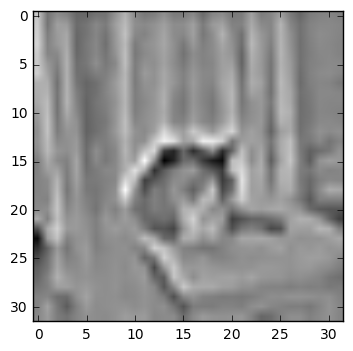

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


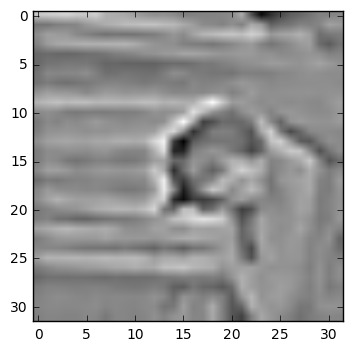

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


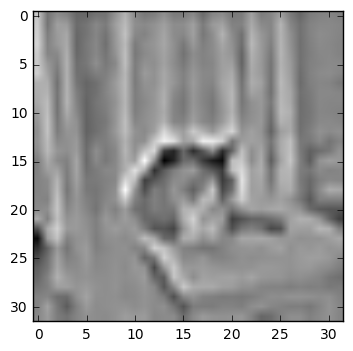

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


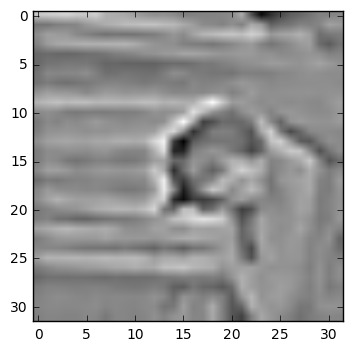

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


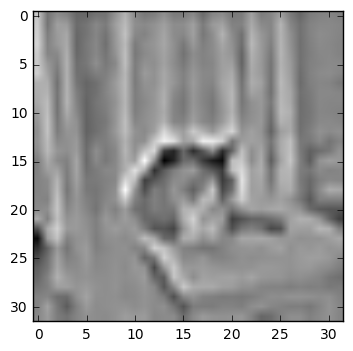

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


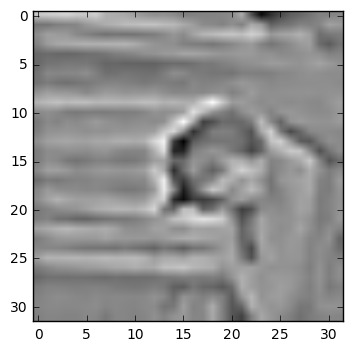

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


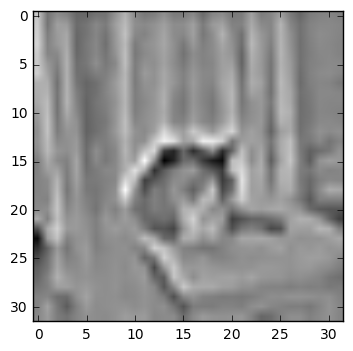

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


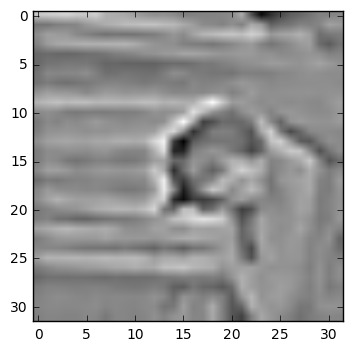

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


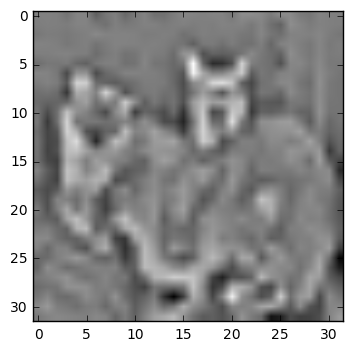

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


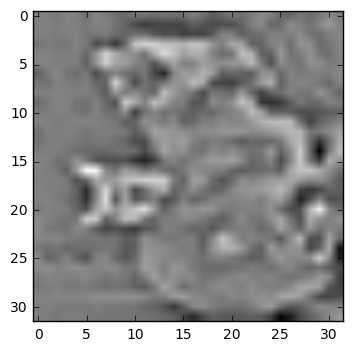

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


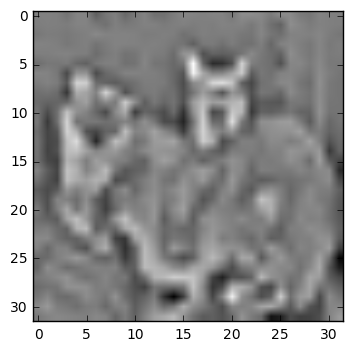

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


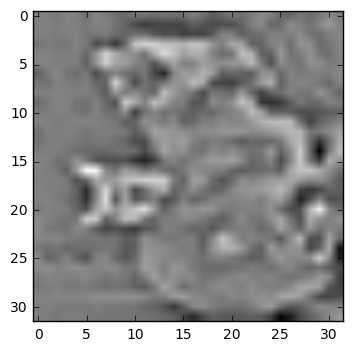

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


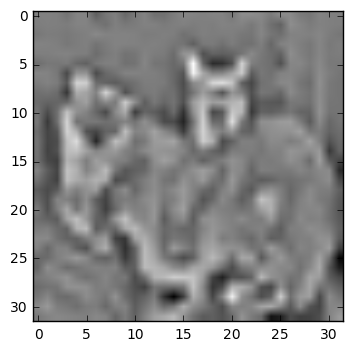

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


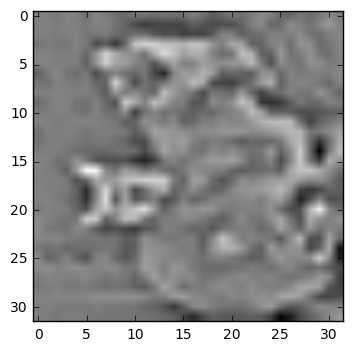

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


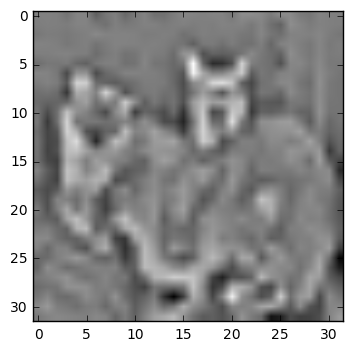

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


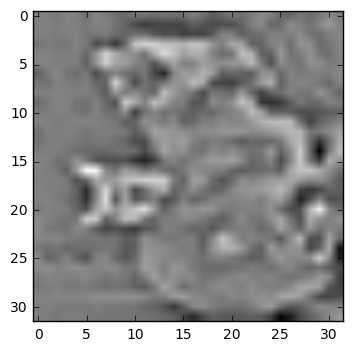

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


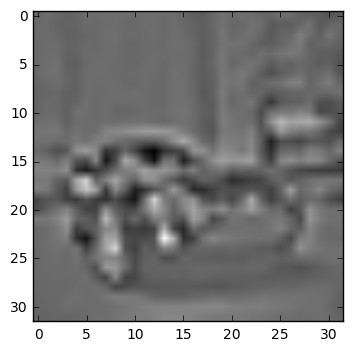

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


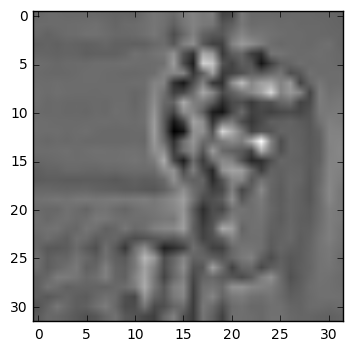

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


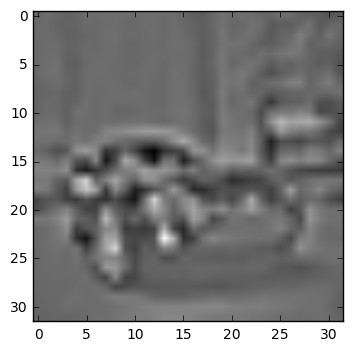

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


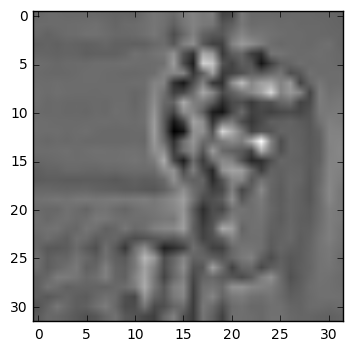

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


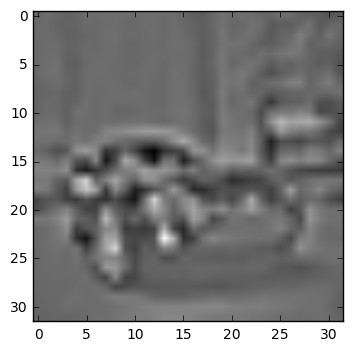

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


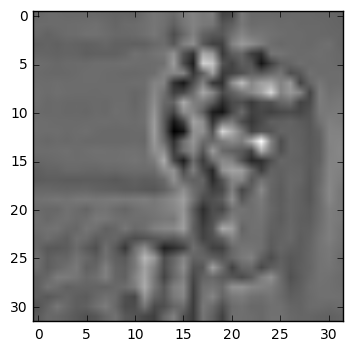

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


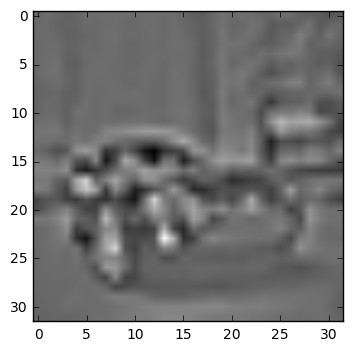

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


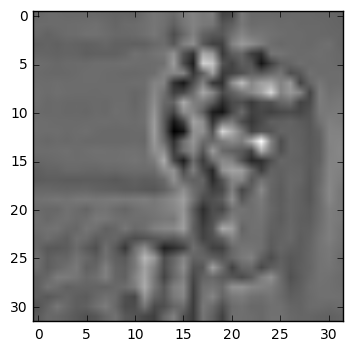

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


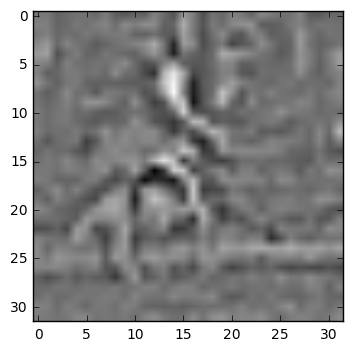

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


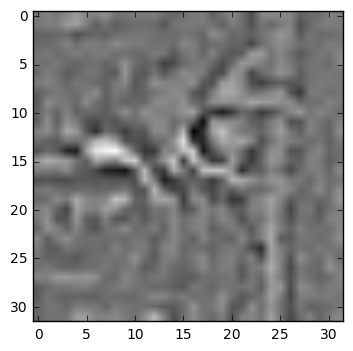

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


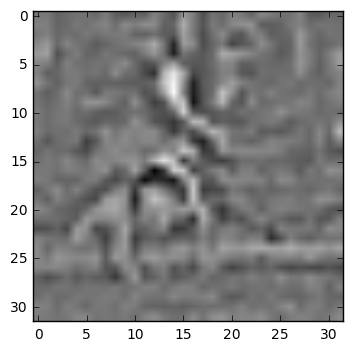

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


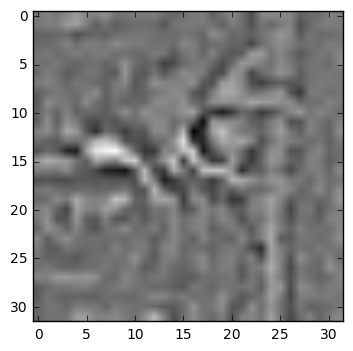

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


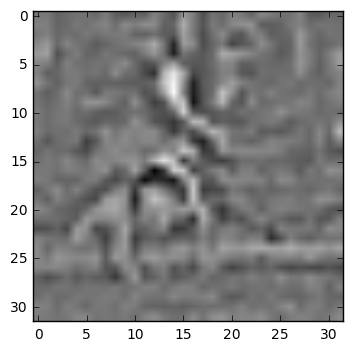

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


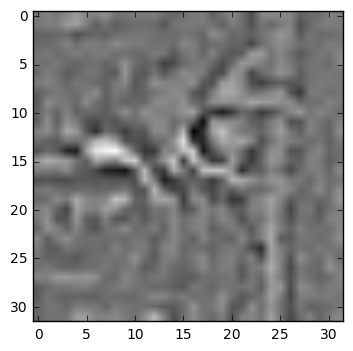

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


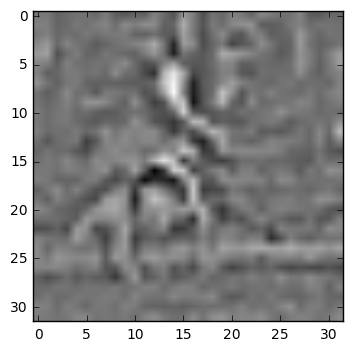

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


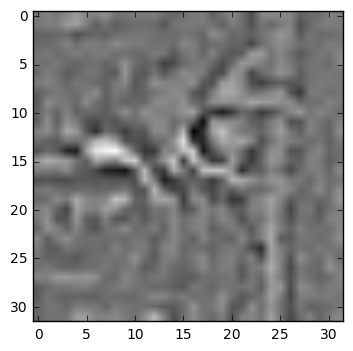

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


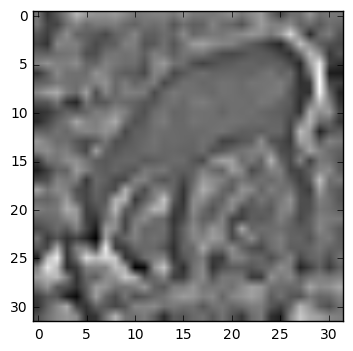

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


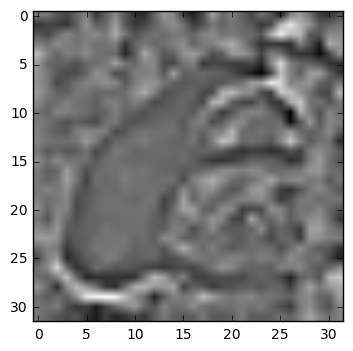

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


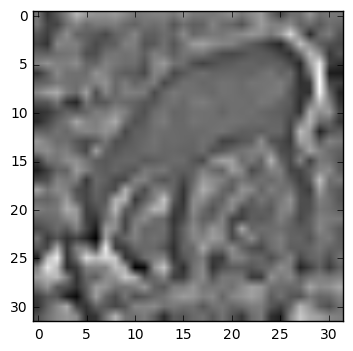

(1024, 1) (1024, 1) (1024, 1)
(1024, 3)
(1024,)


KeyboardInterrupt: 

In [46]:
plot_gray(X_res[10000:100010])